In [1]:
# This program generates Raster plots for different simulations
# It generate Fig. 6B raster plots 
# It generates the supplementary figures with raster plots of the column in all the 'optogenetic experiments'
# We switch off a particular group and observe the effetc on the oscillations

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [3]:
#Importing some info I need for this program
runtime=np.loadtxt("../general_files/runtime.txt")*1000 #Runtime of the simulations

#Number of neurons for each type in each of the 4 layers
N= (np.loadtxt("../general_files/N.txt").reshape(4, 4)).astype(int)
Ntot=5000
#In layer 1: 
N1=int(0.0192574218*Ntot)
#print(N1)

print("The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1")
print("Total number of neurons in the column: %s + %s \n85 perc excitatory and 15 perc inhibitory \nIn each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   "%(Ntot,N1))
print("Number of neurons for each type in each of the 4 layers:")
print(N)
print("The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6")

The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1
Total number of neurons in the column: 5000 + 96 
85 perc excitatory and 15 perc inhibitory 
In each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   
Number of neurons for each type in each of the 4 layers:
[[1236   65   47  107]
 [1010   98   53   27]
 [ 741   63   56   11]
 [1263  102  102   19]]
The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6


In [4]:
#Folder where the spikes files and the spike counts are contained
#I uncomment the one I want to then plot

#This is for Fig 6B (control case)
#a="simulations_data/Cont/Spikes_files_30pA"

#This is for Fig 6B (switch off in all layers a particular group)
a="../simulations_data/Cont/Spikes_files_pv_all"
#a="../simulations_data/Cont/Spikes_files_sst_all"
#a="../simulations_data/Cont/Spikes_files_vip_all"
#a="../simulations_data/Cont/Spikes_files_inh_all"

#Supplementary figures (all optogenetics experiments)
#OPTOGENETICS
#a="../simulations_data/Cont/OPTO/Spikes_files_pv4"
#a="../simulations_data/Cont/OPTO/Spikes_files_sst4"
#a="../simulations_data/Cont/OPTO/Spikes_files_vip4"
#a="../simulations_data/Cont/OPTO/Spikes_files_inh4"
#a="../simulations_data/Cont/OPTO/Spikes_files_inh23"
#a="../simulations_data/Cont/OPTO/Spikes_files_inh5"
#a="../simulations_data/Cont/OPTO/Spikes_files_inh6"
#a="../simulations_data/Cont/OPTO/Spikes_files_inh4_23"

#a="../simulations_data/Cont/OPTO/Spikes_files_pv4_pv23"
#a="../simulations_data/Cont/OPTO/Spikes_files_pv4_pv23_sst23"
#a="../simulations_data/Cont/OPTO/Spikes_files_pv4_pv23_vip23"
#a="../simulations_data/Cont/OPTO/Spikes_files_pv4_pv23_sst23_vip23"
#a="../simulations_data/Cont/OPTO/Spikes_files_sst4_vip4_sst23_vip23"

#a="../simulations_data/Cont/OPTO/Spikes_files_in4_23_except_sst23"
#a="../simulations_data/Cont/OPTO/Spikes_files_in4_23_except_vip23"


#a="../simulations_data/Cont/OPTO/Spikes_files_pv23"
#a="../simulations_data/Cont/OPTO/Spikes_files_pv5"
#a="../simulations_data/Cont/OPTO/Spikes_files_pv6"

#a="../simulations_data/Cont/OPTO/Spikes_files_pv_all_only"
#a="../simulations_data/Cont/OPTO/Spikes_files_sst_all_only"
#a="../simulations_data/Cont/OPTO/Spikes_files_vip_all_only"

#a="../simulations_data/Cont/OPTO/Spikes_files_pv_SUB_all"


#Zoom on only layer 4 (all the other neurons are switched off except the one in layer 4)
#a="../simulations_data/l4/Spikes_files_l4_"
#a="../simulations_data/l4/Spikes_files_l4_pv"
#a="../simulations_data/l4/Spikes_files_l4_sst"
#a="../simulations_data/l4/Spikes_files_l4_vip"
#a="../simulations_data/l4/Spikes_files_l4_pvSUB"

In [5]:
#Upload the spikes files
#layer1
S_vip1i=np.array(np.loadtxt(a+'/S_vip1i.txt') )
S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000

#layer23
S_e23i=np.array(np.loadtxt(a+'/S_e23i.txt') )
S_e23t=np.array(np.loadtxt(a+'/S_e23t.txt') )*1000

S_pv23i=np.array(np.loadtxt(a+'/S_pv23i.txt') )
S_pv23t=np.array(np.loadtxt(a+'/S_pv23t.txt') )*1000

S_sst23i=np.array(np.loadtxt(a+'/S_sst23i.txt') )
S_sst23t=np.array(np.loadtxt(a+'/S_sst23t.txt') )*1000

S_vip23i=np.array(np.loadtxt(a+'/S_vip23i.txt') )
S_vip23t=np.array(np.loadtxt(a+'/S_vip23t.txt') )*1000

#layer4
S_e4i=np.array(np.loadtxt(a+'/S_e4i.txt') )
S_e4t=np.array(np.loadtxt(a+'/S_e4t.txt') )*1000

S_pv4i=np.array(np.loadtxt(a+'/S_pv4i.txt') )
S_pv4t=np.array(np.loadtxt(a+'/S_pv4t.txt') )*1000

S_sst4i=np.array(np.loadtxt(a+'/S_sst4i.txt') )
S_sst4t=np.array(np.loadtxt(a+'/S_sst4t.txt') )*1000

S_vip4i=np.array(np.loadtxt(a+'/S_vip4i.txt') )
S_vip4t=np.array(np.loadtxt(a+'/S_vip4t.txt') )*1000

#layer5
S_e5i=np.array(np.loadtxt(a+'/S_e5i.txt') )
S_e5t=np.array(np.loadtxt(a+'/S_e5t.txt') )*1000

S_pv5i=np.array(np.loadtxt(a+'/S_pv5i.txt') )
S_pv5t=np.array(np.loadtxt(a+'/S_pv5t.txt') )*1000

S_sst5i=np.array(np.loadtxt(a+'/S_sst5i.txt') )
S_sst5t=np.array(np.loadtxt(a+'/S_sst5t.txt') )*1000

S_vip5i=np.array(np.loadtxt(a+'/S_vip5i.txt') )
S_vip5t=np.array(np.loadtxt(a+'/S_vip5t.txt') )*1000

#layer6
S_e6i=np.array(np.loadtxt(a+'/S_e6i.txt') )
S_e6t=np.array(np.loadtxt(a+'/S_e6t.txt') )*1000

S_pv6i=np.array(np.loadtxt(a+'/S_pv6i.txt') )
S_pv6t=np.array(np.loadtxt(a+'/S_pv6t.txt') )*1000

S_sst6i=np.array(np.loadtxt(a+'/S_sst6i.txt') )
S_sst6t=np.array(np.loadtxt(a+'/S_sst6t.txt') )*1000

S_vip6i=np.array(np.loadtxt(a+'/S_vip6i.txt') )
S_vip6t=np.array(np.loadtxt(a+'/S_vip6t.txt') )*1000

/var/folders/g8/wc_cnc9d1c99zpfysr5nkmkc0000gn/T/ipykernel_11438/1509631370.py:3: UserWarning: loadtxt: input contained no data: "../simulations_data/Cont/Spikes_files_pv_all/S_vip1i.txt"
  S_vip1i=np.array(np.loadtxt(a+'/S_vip1i.txt') )
/var/folders/g8/wc_cnc9d1c99zpfysr5nkmkc0000gn/T/ipykernel_11438/1509631370.py:4: UserWarning: loadtxt: input contained no data: "../simulations_data/Cont/Spikes_files_pv_all/S_vip1t.txt"
  S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000


In [6]:
#Time of the simulation I am interested in looking at 
xmin=54.5*1000
xmax=55.5*1000

# xmin=1*1000
# xmax=2*1000

# xmin=38*1000
# xmax=39*1000

# xmin=54*1000
# xmax=55*1000

/var/folders/g8/wc_cnc9d1c99zpfysr5nkmkc0000gn/T/ipykernel_11438/2002093965.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


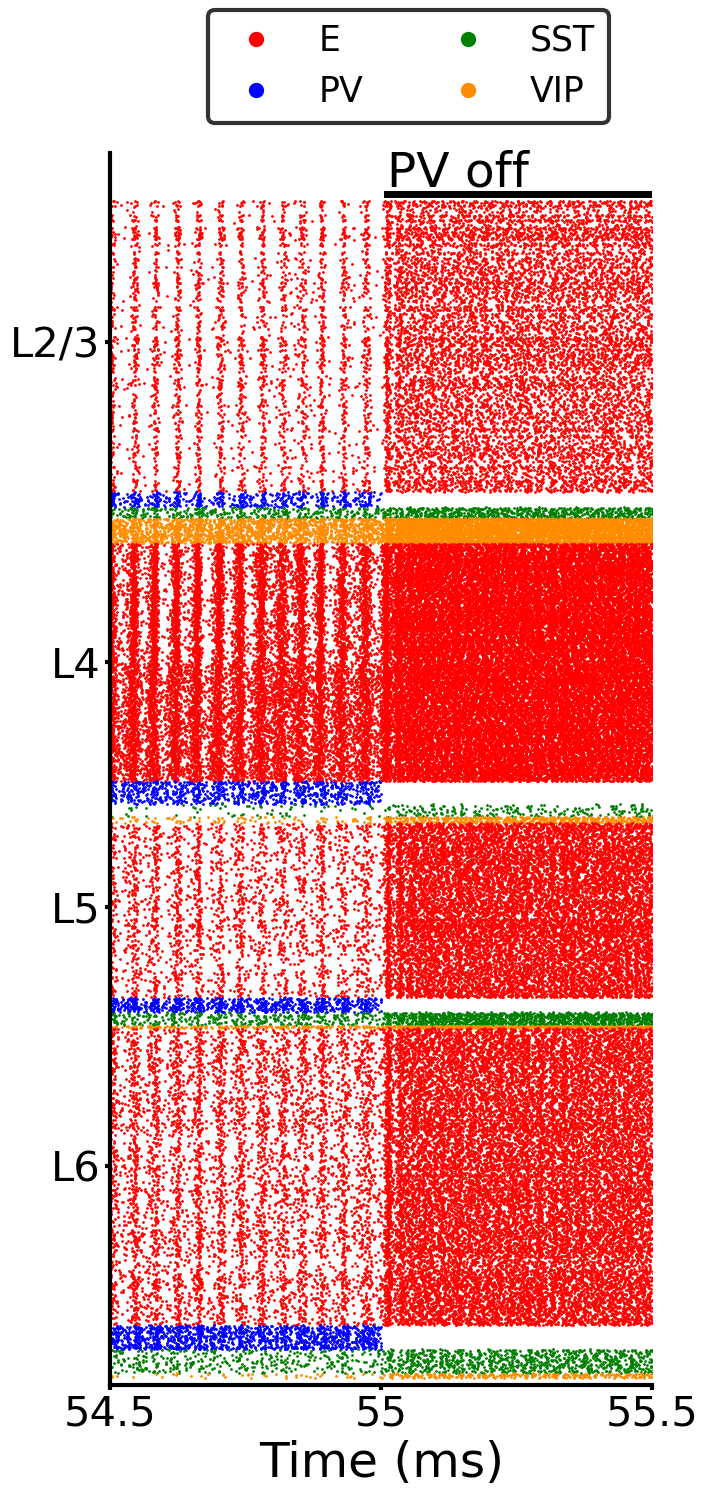

In [7]:
Ntot=5000 #total number of neurons (rows) in the plot
#Need this for the raster plot
N1=int(0.0192574218*Ntot) 
N2_3=int(0.291088453*Ntot)
N4=int(0.237625904*Ntot)
N5=int(0.17425693*Ntot)
N6= Ntot-N2_3-N4-N5

#FROM LAYER 2/3 TOP to LAYER 6 bottom of the plot
#I need the indexes to build the rows
i_e23=S_e23i+ N[0][3]+N[0][2]+N[0][1]
i_pv23=S_pv23i+ N[0][3]+N[0][2]
i_sst23=S_sst23i+ N[0][3]
i_vip23=S_vip23i

i_e4=S_e4i+ N[1][3]+N[1][2]+N[1][1]
i_pv4=S_pv4i+ N[1][3]+N[1][2]
i_sst4=S_sst4i+ N[1][3]
i_vip4=S_vip4i

i_e5=S_e5i+ N[2][3]+N[2][2]+N[2][1]
i_pv5=S_pv5i+ N[2][3]+N[2][2]
i_sst5=S_sst5i+ N[2][3]
i_vip5=S_vip5i

i_e6=S_e6i+ N[3][3]+N[3][2]+N[3][1]
i_pv6=S_pv6i+ N[3][3]+N[3][2]
i_sst6=S_sst6i+ N[3][3]
i_vip6=S_vip6i

#create the figure
f,ax= plt.subplots(figsize=(7,16))

#Layer 2/3
ax.plot(S_e23t,i_e23+N6+N5+N4,'.', markersize=2,color='r', label='E')
ax.plot(S_pv23t,i_pv23+N6+N5+N4,'.', markersize=2,color='b', label='PV')
ax.plot(S_sst23t,i_sst23+N6+N5+N4,'.', markersize=2,color='g', label='SST')
ax.plot(S_vip23t,i_vip23+N6+N5+N4,'.', markersize=2,color='darkorange', label='VIP')
#Layer 4
ax.plot(S_e4t,i_e4+N6+N5,'.', markersize=2,color='r')
ax.plot(S_pv4t,i_pv4+N6+N5,'.', markersize=2,color='b')
ax.plot(S_sst4t,i_sst4+N6+N5,'.', markersize=2,color='g')
ax.plot(S_vip4t,i_vip4+N6+N5,'.', markersize=2,color='darkorange')
#Layer 5
ax.plot(S_e5t,i_e5+N6,'.', markersize=2,color='r')
ax.plot(S_pv5t,i_pv5+N6,'.', markersize=2,color='b')
ax.plot(S_sst5t,i_sst5+N6,'.', markersize=2,color='g')
ax.plot(S_vip5t,i_vip5+N6,'.', markersize=2,color='darkorange')
#Layer 6
ax.plot(S_e6t,i_e6,'.', markersize=2,color='r')
ax.plot(S_pv6t,i_pv6,'.', markersize=2,color='b')
ax.plot(S_sst6t,i_sst6,'.', markersize=2,color='g')
ax.plot(S_vip6t,i_vip6,'.', markersize=2,color='darkorange')

ax.set_xlim(xmin,xmax) #I plot the desired part, defined above
plt.ylim(-30,5205)
#plt.legend(fontsize=19) #If you want to plot the standard legend


#Layout
plt.setp(ax.spines.values(), linewidth=3)
#Remove only 2 edges of the box
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

#Ticks size and lables
plt.xticks(size=30)
plt.locator_params(axis='x', nbins=5) #How many ticks on x axis
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
plt.xlabel('Time (ms)', size=35)
#plt.ylabel('neuron index', size=30)

#Create names of layers on the y-axis
lab = ('L6', 'L5',
               'L4', 'L2/3')
y_pos = [900,2000,3040,4400] #position where to put the labels
plt.yticks(y_pos, lab,size=28)
plt.yticks(size=30)
#If you don't want the label on y axis uncomment this
#ax.get_yaxis().set_visible(False)


#Use the one correct for the plot
labels = [item.get_text() for item in ax.get_xticklabels()]
labels= ['54.5','55','55.5']
#labels= ['38','38.5','39']
#labels= ['1','1.5','2']
#labels= ['45','45.5','46']
plt.locator_params(axis='x', nbins=2)
ax.set_xticklabels(labels)

#Legend (if you want it uncomment this)
plt.legend(loc="upper left", markerscale=5., fontsize=23)
l1= plt.legend(loc='upper center', bbox_to_anchor=(0.55, 1.13),
          ncol=2, fancybox=True, markerscale=10, shadow=False, fontsize=25)
l1.get_frame().set_linewidth(3.0)
l1.get_frame().set_edgecolor('k')

plt.axhline(5030, xmin =0.51, xmax =1,color='k', linewidth=5)

#Add text (Uncomment the one you want for the specific plot)
plt.text(55010,5060,'PV off',rotation=360,size=35)
#plt.text(55010,5060,'SST off',rotation=360,size=35)
#plt.text(55010,5060,'VIP off',rotation=360,size=35)
#plt.text(55010,5060,'All inhibitory off',rotation=360,size=25)
#plt.text(55010,5060,'PV sub. off',rotation=360,size=35)

#plt.text(55000,5060,'PV4 off',rotation=360,size=22)
#plt.text(55000,5060,'SST4 off',rotation=360,size=22)
#plt.text(55000,5060,'VIP4 off',rotation=360,size=22)
#plt.text(55000,5060,'INHIB4 off',rotation=360,size=22)
#plt.text(55000,5060,'INHIB5 off',rotation=360,size=22)
#plt.text(55000,5060,'INHIB2/3 off',rotation=360,size=22)
#plt.text(55000,5060,'INHIB2/3 & 4 off',rotation=360,size=22)
#plt.text(55000,5060,'INHIB6 off',rotation=360,size=22)

#plt.text(55000,5060,'PV4 & PV2/3 off',rotation=360,size=22)
#plt.text(55000,5060,'PV4,PV2/3,SST2/3 off',rotation=360,size=20)
#plt.text(55000,5060,'SST & VIP off',rotation=360,size=22)
#plt.text(55000,5060,'PV & SST off',rotation=360,size=22)
#plt.text(55000,5060,'PV2/3 off',rotation=360,size=22)
#plt.text(55000,5060,'PV6 off',rotation=360,size=22)
#plt.text(55000,5060,'PV5 off',rotation=360,size=22)




#Save fig (Uncomment the one you want for the specific plot)
plt.savefig('../IMAGES/Fig6B_offPV.png')
#plt.savefig('../IMAGES/fig6B_offSST.png')
#plt.savefig('../IMAGES/fig6B_offVIP.png')
#plt.savefig('../IMAGES/fig6B_offINHIB.png')
#plt.savefig('../IMAGES/fig6B_normal.png')


#plt.savefig('../IMAGES/figOPTO_pv4.png')
#plt.savefig('../IMAGES/figOPTO_sst4.png')
#plt.savefig('../IMAGES/figOPTO_vip4.png')


#plt.savefig('../IMAGES/figOPTO_inh23.png')
#plt.savefig('../IMAGES/figOPTO_inh4.png')
#plt.savefig('../IMAGES/figOPTO_inh5.png')
#plt.savefig('../IMAGES/figOPTO_inh6.png')
#plt.savefig('../IMAGES/figOPTO_inh4_23.png')
#plt.savefig('../IMAGES/figOPTO_pv4_pv23.png')
#plt.savefig('../IMAGES/figOPTO_pv4_pv23_sst23.png')
#plt.savefig('../IMAGES/figOPTO_pv4_pv23_vip23.png')
#plt.savefig('../IMAGES/figOPTO_pv4_pv23_sst23_vip23.png')
#plt.savefig('../IMAGES/figOPTO_sst4_vip4_sst23_vip23.png')

#plt.savefig('../IMAGES/figOPTO_in4_23_except_sst23.png')
#plt.savefig('../IMAGES/figOPTO_in4_23_except_vip23.png')


#plt.savefig('../IMAGES/figOPTO_pv23.png')
#plt.savefig('../IMAGES/figOPTO_pv5.png')
#plt.savefig('../IMAGES/figOPTO_pv6.png')

#plt.savefig('../IMAGES/figOPTO_vip_all_only.png')
#plt.savefig('../IMAGES/figOPTO_sst_all_only.png')
#plt.savefig('../IMAGES/figOPTO_pv_all_only.png')

#plt.savefig('../IMAGES/figOPTO_pv_SUB_all.png')

#Show fig
plt.show()